In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [38]:
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=1,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=41,
    class_sep=10,
    hypercube=False
)

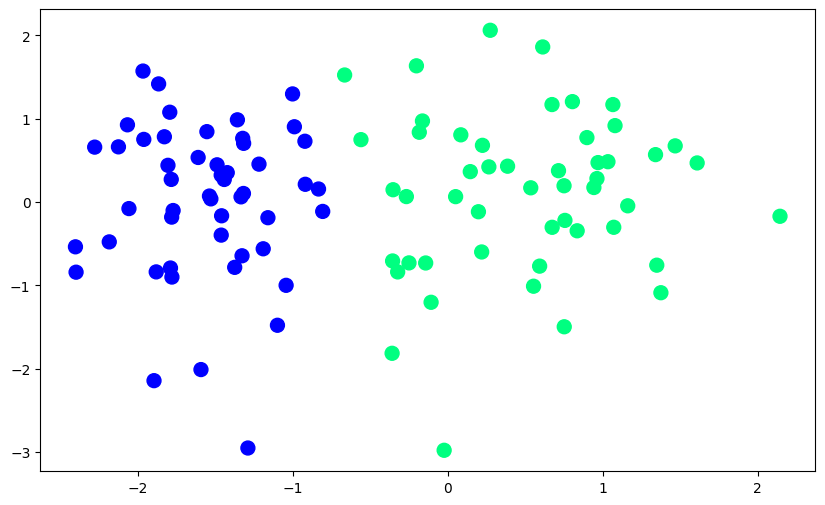

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [40]:
y = np.where(y == 0, -1, 1)

In [41]:
def perceptron(X, y):
    w1 = w2 = b = 0
    lr = 0.1
    epochs = 1000

    for _ in range(epochs):
        for i in range(X.shape[0]):
            z = w1 * X[i][0] + w2 * X[i][1] + b

            # update only if misclassified
            if z * y[i] <= 0:
                w1 = w1 + lr * y[i] * X[i][0]
                w2 = w2 + lr * y[i] * X[i][1]
                b  = b  + lr * y[i]

    return w1, w2, b

In [42]:
def step(z):
    return 1 if z >= 0 else -1


In [43]:
def predict(X, w1, w2, b):
    y_pred = []
    for i in range(X.shape[0]):
        z = w1 * X[i][0] + w2 * X[i][1] + b
        y_pred.append(step(z))
    return np.array(y_pred)

In [44]:
w1, w2, b = perceptron(X, y)
y_pred = predict(X, w1, w2, b)

# Accuracy
accuracy = np.mean(y_pred == y)
print("Weights:", w1, w2)
print("Bias:", b)
print("Accuracy:", accuracy)

Weights: 0.2759429581793074 0.01727671063910833
Bias: 0.2
Accuracy: 1.0


In [45]:
m = -w1 / w2
c = -b / w2
print("Slope (m):", m)
print("Intercept (c):", c)

Slope (m): -15.971961558160885
Intercept (c): -11.57627769416194


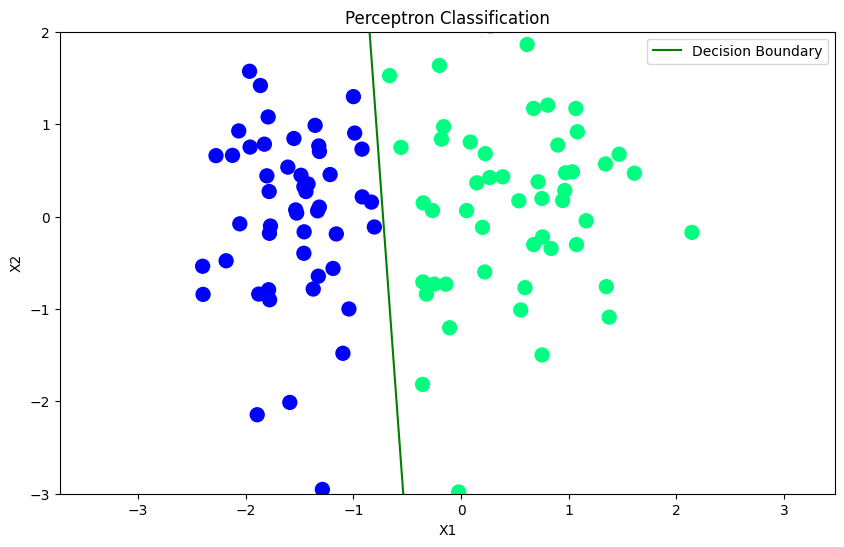

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
x_vals = np.linspace(np.min(X[:,0])-1, np.max(X[:,0])+1, 100)
y_vals = m * x_vals + c
plt.plot(x_vals, y_vals, color='green', label='Decision Boundary')
plt.ylim(-3,2)
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("Perceptron Classification")
plt.show()

In [ ]:
#def perceptron(X, y):
    w1 = w2 = b = 0
    lr = 0.1

    for j in range(1000):
        for i in range(X.shape[0]):
            z = w1*X[i][0] + w2*X[i][1] + b
            if z * y[i] <= 0:   # include boundary case
                w1 = w1 + lr * y[i] * X[i][0]
                w2 = w2 + lr * y[i] * X[i][1]
                b  = b  + lr * y[i]

    return w1, w2, b


In [23]:
def perceptron(X,y):
    lr=0.1
    w1=w2=n=b=0
    for j in range(1000):
        for i in range(X.shape[0]):
            z= w1*X[i][0] + w2*X[i][1]+ b
            y_hinge =1 if y[i] == 1 else 0
            if y_hinge*z<1:
                w1=w1+lr*y_hinge*X[i][0]
                w2=w2+lr*y_hinge*X[i][1]
                b= b+ lr*y_hinge
    return w1,w2,b

In [15]:
w1,w2,b=perceptron(X,y)

In [16]:
m = -(w1/w2)

In [17]:
c = - (b/w2)

In [18]:
print(m,c)

0.399950782121792 9.39560681964477


In [19]:
x_input=np.linspace(-3,3,100)
y_input = m*x_input+c

(-3.0, 2.0)

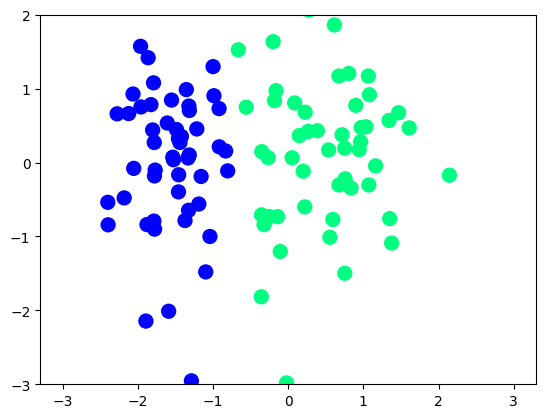

In [20]:
plt.Figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)